In [386]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [388]:
#reading the csv file that contains all the data
data = pd.read_csv('/content/drive/MyDrive/cancer_reg.csv', encoding='ISO-8859-1')

In [389]:
#calculating the number of samples
no_of_samples=data.shape[0]
print("Total number of samples: ",no_of_samples)

Total number of samples:  3047


In [390]:
#calculating the umber of features
no_of_features=data.shape[1]
print("Total no of features: ",no_of_features-1)

Total no of features:  33


In [391]:

# Finding the minimum and maximum values for each column
min_values = data.min()
max_values = data.max()

print("Minimum values for each column:")
print(min_values)

print("\nMaximum values for each column:")
print(max_values)

Minimum values for each column:
avgAnnCount                                             6.0
avgDeathsPerYear                                          3
TARGET_deathRate                                       59.7
incidenceRate                                         201.3
medIncome                                             22640
popEst2015                                              827
povertyPercent                                          3.2
studyPerCap                                             0.0
binnedInc                                (34218.1, 37413.8]
MedianAge                                              22.3
MedianAgeMale                                          22.4
MedianAgeFemale                                        22.3
Geography                  Abbeville County, South Carolina
AvgHouseholdSize                                     0.0221
PercentMarried                                         23.1
PctNoHS18_24                                            0.0
PctHS18_

In [392]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [393]:
data= pd.DataFrame(data)

In [394]:
data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [395]:
# column names are lower cased to make them easy to write and read
data.rename(columns=lambda x: str.lower(x), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  avghouseholdsize         3047 non-null   float64
 14  percentmarried          

In [396]:
data.isna().sum()

,0
avganncount,0
avgdeathsperyear,0
target_deathrate,0
incidencerate,0
medincome,0
popest2015,0
povertypercent,0
studypercap,0
binnedinc,0
medianage,0


In [397]:
data=data.drop(['geography', 'pctsomecol18_24','pctprivatecoveragealone','pctemployed16_over','binnedinc'], axis=1)

In [398]:
data.corr(method = 'pearson')

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
avganncount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.132244,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgdeathsperyear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.056183,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
target_deathrate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.386066,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidencerate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.105174,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medincome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.724175,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popest2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.052677,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertypercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.822534,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studypercap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.092545,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
medianage,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,0.004665,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
medianagemale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,0.082232,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


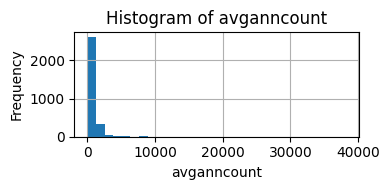

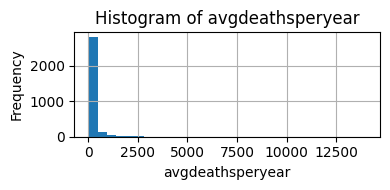

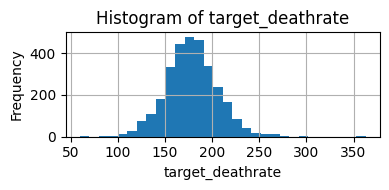

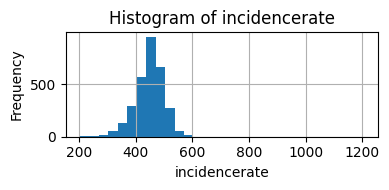

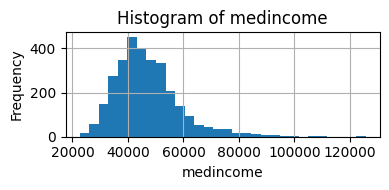

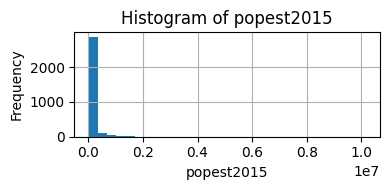

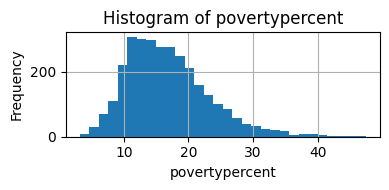

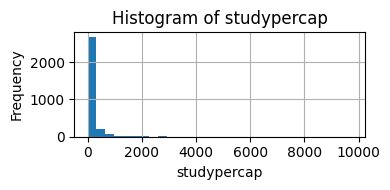

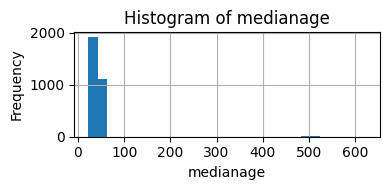

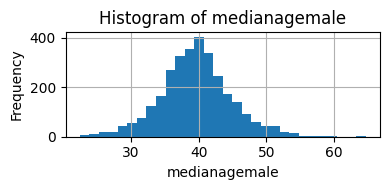

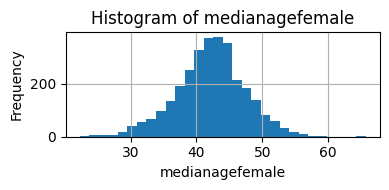

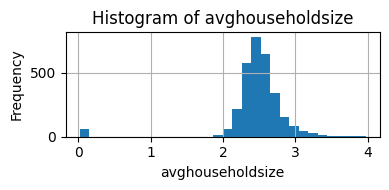

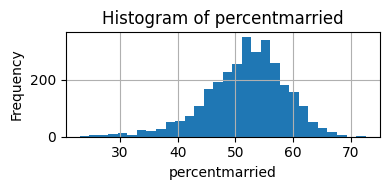

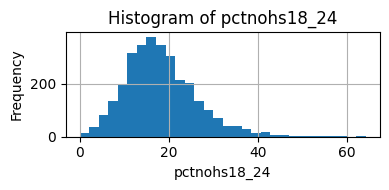

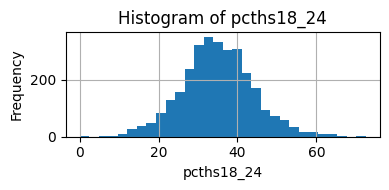

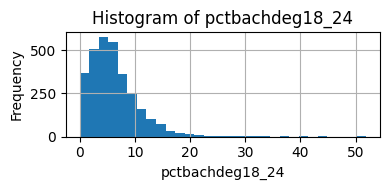

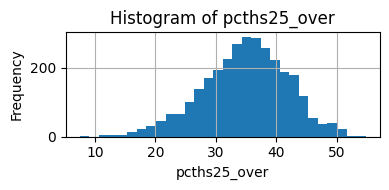

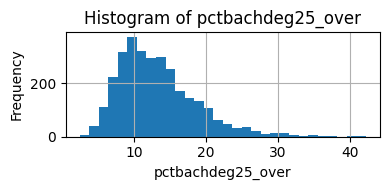

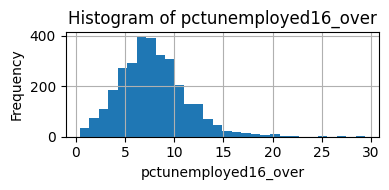

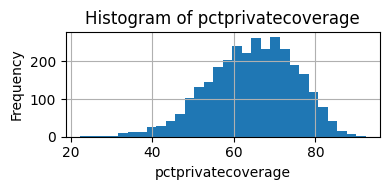

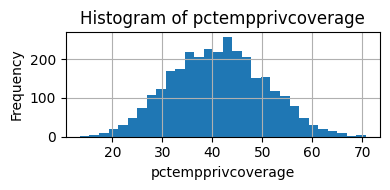

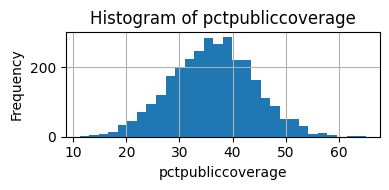

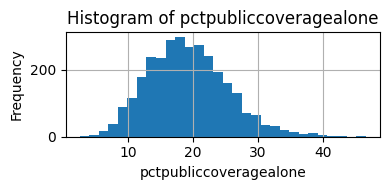

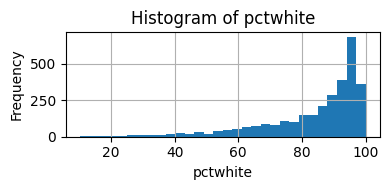

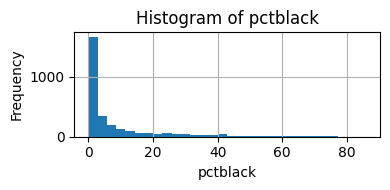

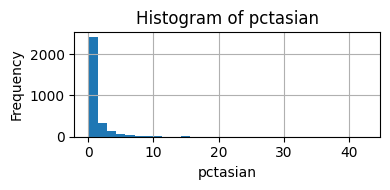

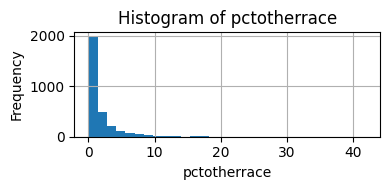

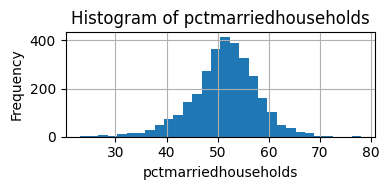

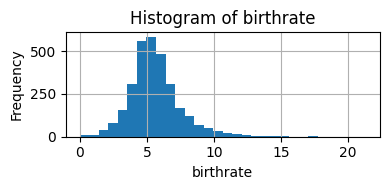

In [399]:
#to show the histogram of each feature
import matplotlib.pyplot as plt
for column in data.columns:
    # Check if the column is numeric before plotting
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(4, 2))
        plt.hist(data[column].dropna(), bins=30)  # dropna() removes missing values for clean plotting
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [400]:
features_all = data.drop(columns=['target_deathrate'],axis=1)  # Replace 'target_deathrate' with the target column name
target = data['target_deathrate']


In [401]:
#log transform of all features since features are skewed
log_transform_features_all =['incidencerate','pctpubliccoveragealone','povertypercent','pcths25_over','pctpubliccoverage', 'pctunemployed16_over', 'pcths18_24']
data[log_transform_features_all] = data[log_transform_features_all].apply(lambda x: np.log1p(x))

In [402]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_all)

# Convert the scaled features back to a DataFrame for easier handling
scaled_features_df = pd.DataFrame(scaled_features, columns=features_all.columns)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(scaled_features_df, target, test_size=0.2, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=50)

### **Linear Regression**

In [403]:
#code for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_model = LinearRegression()

test_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = test_model.predict(X_val)

# Make predictions on the test set (after validation)
y_test_pred = test_model.predict(X_test)

# Evaluate the model on validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r_squared = test_model.score(X_val, y_val)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r_squared = test_model.score(X_test, y_test)


In [404]:
print("Validation Set:")
print("Validation RMSE:", val_rmse)
print("Validation R-squared:", val_r_squared)

print("\nTest Set:")
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r_squared)

Validation Set:
Validation RMSE: 19.324401194493063
Validation R-squared: 0.4725323612428053

Test Set:
Test RMSE: 18.375589903562396
Test R-squared: 0.6802217868445148


## Defining input and output again for DNN Models

In [405]:
# loading input and outpur
X=dataset[['incidencerate','pctpubliccoveragealone','povertypercent','pcths25_over','pctpubliccoverage', 'pctunemployed16_over', 'pcths18_24']]
Y=dataset['target_deathrate']

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [407]:
#Split training + validation into training and validation sets (80% of 80% = 64% training, 16% validation)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2, random_state=0)


In [408]:
#normalize all the featurres
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [409]:
#importing all the required libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# DNN 16

In [410]:
import numpy as np
import random
seed_value = 0

# Set the random seeds for reproducibility

np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)


In [411]:
# code for printed date and time
# Custom callback to add date and time at the beginning and end of each epoch
import time
from datetime import datetime
from tensorflow.keras.callbacks import Callback


class TimeHistory(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()
        self.start_time = datetime.now()  # Store the start time for each epoch
        print(f"Epoch {epoch + 1} started at {self.start_time.strftime('%Y-%m-%d %H:%M:%S')}")

    def on_epoch_end(self, epoch, logs=None):
        epoch_duration = time.time() - self.epoch_time_start
        self.end_time = datetime.now()  # Store the end time for each epoch
        print(f"Epoch {epoch + 1} ended at {self.end_time.strftime('%Y-%m-%d %H:%M:%S')} and took {epoch_duration:.2f} seconds")

In [412]:

# starting to write the code of DNN model
test_model = Sequential()
test_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # First hidden layr of 16 neurons
test_model.add(Dense(1))  # Output layer

# Using Adam optimizer
test_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

time_callback = TimeHistory()

# Training the model
history=test_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), verbose=1, callbacks=[time_callback])

# calculations on validation set
Y_val_pred = test_model.predict(X_val)
MSE_val = mean_squared_error(Y_val, Y_val_pred)
RSME_val = np.sqrt(MSE_val)
r2_val = r2_score(Y_val,Y_val_pred)

# calculations on test set
Y_test_pred = test_model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Calculate MSE, RSME, Rsqured of validation and test sets
{
    'Validation MSE': MSE_val,
    'Validation RMSE': RSME_val,
    'Validation R-squared': r2_val,
    'Test MSE': mse_test,
    'Test RMSE': rmse_test,
    'Test R-squared': r2_test
}

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1 started at 2024-09-21 16:50:34
Epoch 1/100
51/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32188.5449Epoch 1 ended at 2024-09-21 16:50:36 and took 1.59 seconds
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 32108.8945 - val_loss: 29286.0410
Epoch 2 started at 2024-09-21 16:50:36
Epoch 2/100
26/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28640.1602 Epoch 2 ended at 2024-09-21 16:50:36 and took 0.16 seconds
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27424.7422 - val_loss: 18946.0449
Epoch 3 started at 2024-09-21 16:50:36
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15845.9512Epoch 3 ended at 2024-09-21 16:50:36 and took 0.22 seconds
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15802.4990 - val_loss: 8332.9375
Epoch 4 started at 2024-09-21 16:50:36
Epoch 4/100
36/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7648.9429  Epoch 4 ended at 2024-09-21 16:50:37 and took 0.23 seconds
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7431.4863 - val_loss: 5387.2163
Epoch 5 s

{'Validation MSE': 415.4787236903057,
 'Validation RMSE': 20.38329521177343,
 'Validation R-squared': 0.4418044900064966,
 'Test MSE': 386.0257796187687,
 'Test RMSE': 19.647538767458094,
 'Test R-squared': 0.5107244760153309}

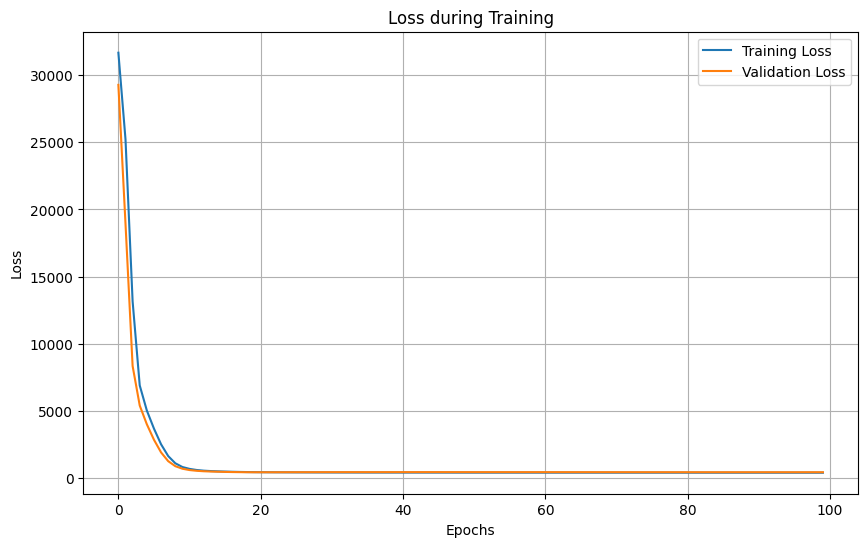

In [413]:
#ploting the graph of loss mse against epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### **DNN 30-8**

In [414]:
import numpy as np
import random
seed_value = 0

# Set the random seeds for reproducibility

np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [415]:

# the second DNN model
test_model = Sequential()
test_model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 30 neurons
test_model.add(Dense(8, activation='relu'))  # Second hidden layer with ReLU activation
test_model.add(Dense(1))  # final output layer

# using Adam optimizer
test_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Training the model
history=test_model.fit(X_train, Y_train, epochs=100, verbose=1,validation_split=0.2,callbacks=[time_callback])

Epoch 1 started at 2024-09-21 16:51:10
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32162.4004Epoch 1 ended at 2024-09-21 16:51:11 and took 1.40 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32268.6855 - val_loss: 32168.6992
Epoch 2 started at 2024-09-21 16:51:11
Epoch 2/100
30/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31594.9648 Epoch 2 ended at 2024-09-21 16:51:11 and took 0.17 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31682.5840 - val_loss: 31190.8105
Epoch 3 started at 2024-09-21 16:51:11
Epoch 3/100
37/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30549.1777 Epoch 3 ended at 2024-09-21 16:51:11 and took 0.13 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30554.0547 - val_loss: 29433.3945
Epoch 4 started at 2024-09-21 16:51:11
Epoch 4/100
35/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28623.1230 Epoch 4 ended at 2024-09-21 16:51:11 and took 0.15 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28537.0664 - val_loss: 26448.6094
Epoch 5 started at 2024-09-21 16:51:11
Epoch 5/100
29/49

In [416]:
Y_val_pred = test_model.predict(X_val)
mse_val = mean_squared_error(Y_val, Y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(Y_val, Y_val_pred)

# Evaluation of the test set
Y_test_pred = test_model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Output the results
{
    'Validation MSE': mse_val,
    'Validation RMSE': rmse_val,
    'Validation R-squared': r2_val,
    'Test MSE': mse_test,
    'Test RMSE': rmse_test,
    'Test R-squared': r2_test
}

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


{'Validation MSE': 403.75036162602873,
 'Validation RMSE': 20.093540295976435,
 'Validation R-squared': 0.4575615400563985,
 'Test MSE': 386.4126222315566,
 'Test RMSE': 19.657380858892587,
 'Test R-squared': 0.5102341651810174}

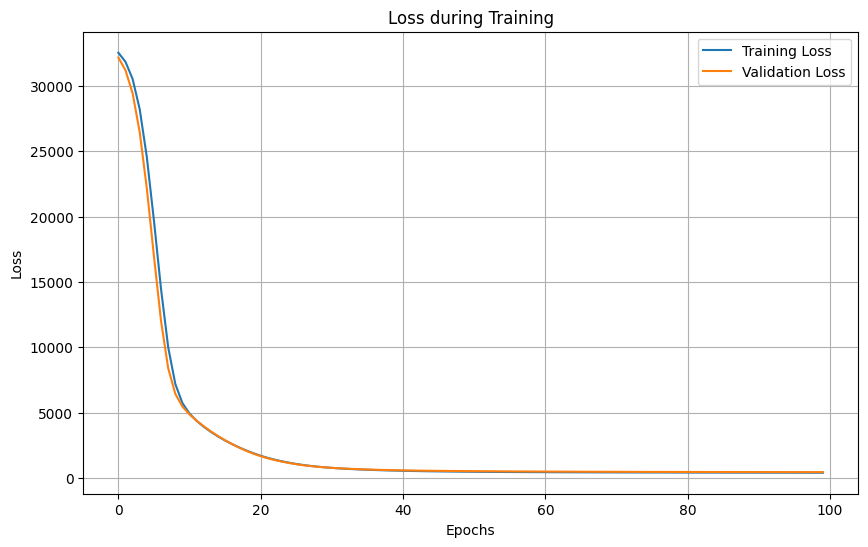

In [417]:
#ploting the graph of loss mse against epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

DNN 30-16-8

In [418]:
import numpy as np
import random
seed_value = 0

# Set the random seeds for reproducibility

np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [419]:
test_model = Sequential()
test_model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 30 neurons
test_model.add(Dense(16, activation='relu'))  # Second hidden layer with ReLU activation
test_model.add(Dense(8, activation='relu'))  # third hidden layer with ReLU activation
test_model.add(Dense(1))  # Output layer

# Compile the model with Adam optimizer
test_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history=test_model.fit(X_train, Y_train, epochs=100, verbose=1,validation_split=0.2,callbacks=[time_callback])

Epoch 1 started at 2024-09-21 16:51:39
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32450.9102Epoch 1 ended at 2024-09-21 16:51:42 and took 2.67 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 32487.1523 - val_loss: 32570.1133
Epoch 2 started at 2024-09-21 16:51:42
Epoch 2/100
29/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32010.5449 Epoch 2 ended at 2024-09-21 16:51:42 and took 0.17 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32105.8027 - val_loss: 31486.0234
Epoch 3 started at 2024-09-21 16:51:42
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30537.4824Epoch 3 ended at 2024-09-21 16:51:42 and took 0.18 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30527.6172 - val_loss: 27530.3457
Epoch 4 started at 2024-09-21 16:51:42
Epoch 4/100
33/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25778.7461 Epoch 4 ended at 2024-09-21 16:51:43 and took 0.16 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25038.1523 - val_loss: 16572.1387
Epoch 5 started at 2024-09-21 16:51:43
Epoch 5/100
42/49 

In [420]:
Y_val_pred = test_model.predict(X_val)
mse_val = mean_squared_error(Y_val, Y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(Y_val, Y_val_pred)

# Evaluate on test set
Y_test_pred = test_model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Output the results
{
    'Validation MSE': mse_val,
    'Validation RMSE': rmse_val,
    'Validation R-squared': r2_val,
    'Test MSE': mse_test,
    'Test RMSE': rmse_test,
    'Test R-squared': r2_test
}

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


{'Validation MSE': 388.8922670465675,
 'Validation RMSE': 19.720351595409436,
 'Validation R-squared': 0.47752338457071875,
 'Test MSE': 371.09506023460443,
 'Test RMSE': 19.26382776694716,
 'Test R-squared': 0.5296486928315485}

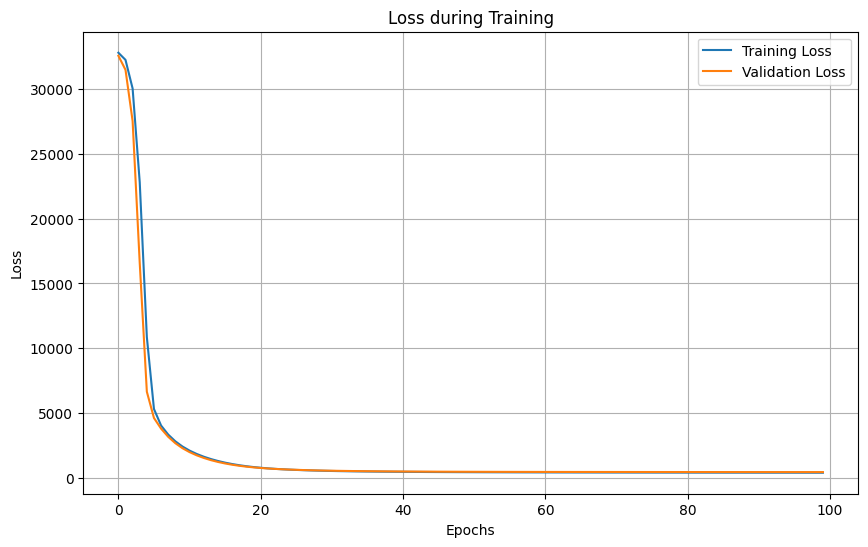

In [421]:
#plot graph for DNN 30-16-8
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

DNN 30-16-8-4

In [422]:
import numpy as np
import random
seed_value = 0

# Set the random seeds for reproducibility

np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [383]:
test_model = Sequential()
test_model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 30 neurons
test_model.add(Dense(16, activation='relu'))  # Second hidden layer with ReLU activation
test_model.add(Dense(8, activation='relu'))  # Second hidden layer with ReLU activation
test_model.add(Dense(4, activation='relu')) # adding fourth hidden layer with ReLU

test_model.add(Dense(1))  # Output layer

# Compile the model with Adam optimizer
test_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history=test_model.fit(X_train, Y_train, epochs=100, verbose=1,validation_split=0.2,callbacks=[time_callback])

Epoch 1 started at 2024-09-21 16:49:45
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32443.6211Epoch 1 ended at 2024-09-21 16:49:48 and took 2.63 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 32497.0273 - val_loss: 32629.4570
Epoch 2 started at 2024-09-21 16:49:48
Epoch 2/100
34/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32096.7070Epoch 2 ended at 2024-09-21 16:49:48 and took 0.26 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32177.2227 - val_loss: 31711.3281
Epoch 3 started at 2024-09-21 16:49:48
Epoch 3/100
39/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30864.1367Epoch 3 ended at 2024-09-21 16:49:48 and took 0.34 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30783.4160 - val_loss: 28142.1777
Epoch 4 started at 2024-09-21 16:49:48
Epoch 4/100
32/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26493.0098Epoch 4 ended at 2024-09-21 16:49:49 and took 0.27 seconds
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25808.6172 - val_loss: 18171.8301
Epoch 5 started at 2024-09-21 16:49:49
Epoch 5/100
38/49 ━

In [384]:
#evaluation on validation set
Y_val_pred = test_model.predict(X_val)
mse_val = mean_squared_error(Y_val, Y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(Y_val, Y_val_pred)

# Evaluate on test set
Y_test_pred = test_model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Output the results
{
    'Validation MSE': mse_val,
    'Validation RMSE': rmse_val,
    'Validation R-squared': r2_val,
    'Test MSE': mse_test,
    'Test RMSE': rmse_test,
    'Test R-squared': r2_test
}

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


{'Validation MSE': 393.356553405615,
 'Validation RMSE': 19.833218432861948,
 'Validation R-squared': 0.4715256175158573,
 'Test MSE': 370.6102225603488,
 'Test RMSE': 19.25123950711613,
 'Test R-squared': 0.5302632093214918}

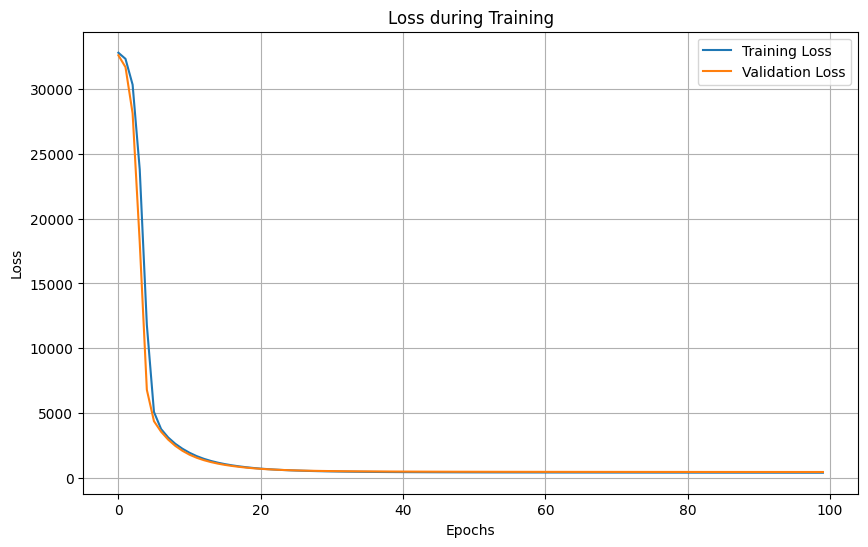

In [385]:
#plotting graph for loss for DNN-30-16-8-4
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()